# **G2M_Case_Study**

# G2M Insights Notebook for Cab Investment Firm

This notebook aims to derive actionable insights for a Cab Investment firm's Go-To-Market strategy using data sourced from [DataGlacier's GitHub repository](https://github.com/DataGlacier/DataSets.git).

## Objective
The primary goal of this analysis is to uncover valuable market insights and trends within the transportation industry to aid the Cab Investment firm in making informed decisions regarding market entry, expansion, or optimization.

## Data Source
The dataset used for this analysis is sourced from the following GitHub repository: [DataGlacier/DataSets](https://github.com/DataGlacier/DataSets.git).

## Analysis Steps
1. **Data Acquisition**: Fetch and preprocess the necessary datasets.
2. **Exploratory Data Analysis (EDA)**: Understand the data distribution, correlations, and initial insights.
3. **Market Trends Analysis**: Investigate key trends in the transportation industry relevant to cab investments.
4. **Customer Segmentation**: Identify and segment potential customer groups.
5. **Predictive Modeling** (if applicable): Develop models to forecast market demand or other relevant predictions.
6. **Recommendations & Insights**: Summarize findings and propose actionable recommendations for the firm.

## Tools and Libraries
The analysis will be conducted using:
- Python programming language
- Pandas, NumPy for data manipulation
- Matplotlib, Seaborn for visualization
- Scikit-learn (if applicable) for machine learning models

## Note
Ensure all necessary permissions and attributions are respected when using the provided dataset from the GitHub repository.

Feel free to contribute, comment, or suggest improvements to this notebook to enhance the insights for the Cab Investment firm.





In [3]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [4]:
#importing the data set
df1=pd.read_csv('Cab_Data.csv')
df2=pd.read_csv('Customer_ID.csv')
df3=pd.read_csv('Transaction_ID.csv')   
df4=pd.read_csv('City.csv') 
df5=pd.read_csv('us_federal_holidays.csv')


In [5]:
#merging the data set
d1 = pd.merge(df1, df3, on='Transaction ID')
d2=pd.merge(d1, df2, on='Customer ID')

In [6]:
d2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [7]:
d2.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [8]:
df=pd.concat([d2,df4,df5], axis=1)

In [9]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [10]:
# hide all warnings runtime
import warnings
warnings.filterwarnings('ignore')

In [11]:
df.isnull().sum()

Transaction ID             0
Date of Travel             0
Company                    0
City                       0
KM Travelled               0
Price Charged              0
Cost of Trip               0
Customer ID                0
Payment_Mode               0
Gender                     0
Age                        0
Income (USD/Month)         0
City                  359372
Population            359372
Users                 359372
Date                  359362
dtype: int64

In [12]:

df.dropna(subset=['City', 'Population', 'Users', 'Date'], inplace=True)


In [13]:
df.fillna(0, inplace=True)


In [14]:
df.isnull().sum()


Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
City                  0
Population            0
Users                 0
Date                  0
dtype: int64

In [15]:

import datetime
# Convert 'Date of Travel' column to datetime
base_date = datetime.datetime(1900, 1, 1)  # Base date
df['Date of Travel'] = base_date + pd.to_timedelta(df['Date of Travel'] - 2, unit='D')  # Subtracting 2 to align with Excel's date system

print


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [16]:
df['Date of Travel'].info


<bound method Series.info of 0    2016-01-08
1    2018-07-21
2    2018-11-23
3    2016-01-06
4    2018-04-21
5    2018-05-04
6    2018-10-27
7    2016-01-02
8    2016-09-21
9    2017-06-23
10   2018-04-21
11   2016-01-07
12   2016-10-27
13   2017-01-27
14   2018-05-11
15   2016-01-03
16   2016-11-06
17   2017-06-03
18   2018-01-13
19   2016-01-07
Name: Date of Travel, dtype: datetime64[ns]>

In [17]:
duplicates = df[df.duplicated(keep=False)]

print(duplicates)

Empty DataFrame
Columns: [Transaction ID, Date of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip, Customer ID, Payment_Mode, Gender, Age, Income (USD/Month), City, Population, Users, Date]
Index: []


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 19
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction ID      20 non-null     int64         
 1   Date of Travel      20 non-null     datetime64[ns]
 2   Company             20 non-null     object        
 3   City                20 non-null     object        
 4   KM Travelled        20 non-null     float64       
 5   Price Charged       20 non-null     float64       
 6   Cost of Trip        20 non-null     float64       
 7   Customer ID         20 non-null     int64         
 8   Payment_Mode        20 non-null     object        
 9   Gender              20 non-null     object        
 10  Age                 20 non-null     int64         
 11  Income (USD/Month)  20 non-null     int64         
 12  City                20 non-null     object        
 13  Population          20 non-null     object        
 14  U

In [19]:
df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,2.000000e+01,20,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.017631e+07,2017-04-20 12:00:00,24.477500,406.350500,302.617830,28082.800000,32.650000,12789.550000
min,1.000001e+07,2016-01-02 00:00:00,6.060000,72.430000,63.024000,27182.000000,23.000000,8536.000000
25%,1.000002e+07,2016-01-07 18:00:00,12.767500,185.105000,139.477500,27606.750000,26.500000,9237.000000
50%,1.015992e+07,2017-03-31 12:00:00,25.455000,368.290000,315.528900,28020.000000,28.000000,10813.000000
75%,1.032155e+07,2018-04-24 06:00:00,34.595000,541.280000,422.779800,28712.000000,33.000000,11927.500000
max,1.041292e+07,2018-11-23 00:00:00,42.550000,893.170000,597.402000,29290.000000,53.000000,23327.000000
std,1.529277e+05,NaN,12.604421,241.565639,163.511058,739.096718,10.955772,5571.219327


In [20]:
df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'City', 'Population', 'Users',
       'Date'],
      dtype='object')

In [21]:
df.shape

(20, 16)

In [22]:
df.isnull().sum().sort_values(ascending=False)

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
City                  0
Population            0
Users                 0
Date                  0
dtype: int64

## Dataset Statistics

- **Total Entries**: 359,392
- **Data Types**:
  - `int64`: Transaction ID, Customer ID, Age, Income (USD/Month)
  - `datetime64[ns]`: Date of Travel
  - `float64`: KM Travelled, Price Charged, Cost of Trip
  - `object`: Company, City, Payment Mode, Gender, Population, Users, Date
  - **Columns**: 
      ['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'City', 'Population', 'Users',
       'Date']

In [23]:
# Calculate profit for each ride
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

# Display the first few rows of the DataFrame with the new 'Profit' column
print(df[['Price Charged', 'Cost of Trip', 'Profit']].head())


   Price Charged  Cost of Trip    Profit
0         370.95      313.6350   57.3150
1         598.70      317.4228  281.2772
2         792.05      597.4020  194.6480
3         358.52      334.8540   23.6660
4         721.10      467.1192  253.9808


In [24]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),City,Population,Users,Date,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,NEW YORK NY,"8,405,837","302,149",2016-01-01,57.3150
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,CHICAGO IL,"1,955,130","164,468",2016-01-18,281.2772
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,LOS ANGELES CA,"1,595,037","144,132",2016-02-15,194.6480
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,MIAMI FL,"1,339,155","17,675",2016-05-30,23.6660
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,SILICON VALLEY,"1,177,609","27,247",2016-07-04,253.9808


In [28]:
df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'City', 'Population', 'Users',
       'Date', 'Profit'],
      dtype='object')

In [29]:

df = df.rename(columns={df.columns[1]: 'Traveler City'})

df = df.rename(columns={'Date': 'US Holidays'})


In [31]:
df.columns

Index(['Transaction ID', 'Traveler City', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'City', 'Population', 'Users',
       'US Holidays', 'Profit'],
      dtype='object')

In [34]:
import os

# Create a folder to store outputs if it doesn't exist
output_folder = 'outputs'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

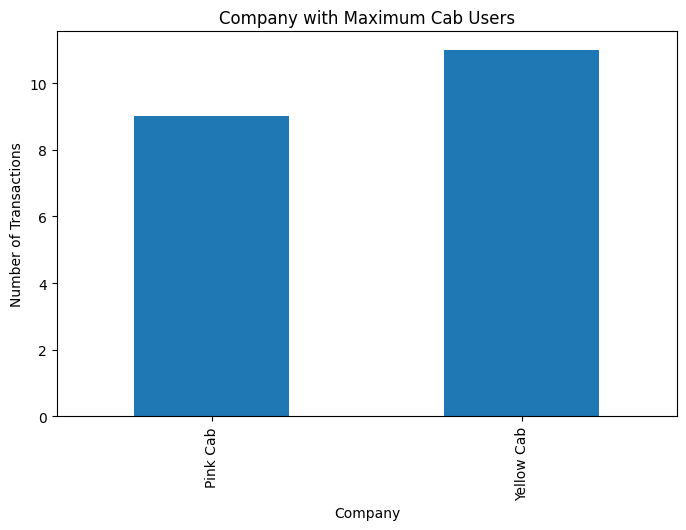

In [40]:
# Hypothesis 2: Company with Maximum Cab Users
company_max_users = df.groupby(['Company'])['Transaction ID'].count()
plt.figure(figsize=(8, 5))
company_max_users.plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Number of Transactions')
plt.title('Company with Maximum Cab Users')
plt.savefig(os.path.join(output_folder, 'company_max_users.png'))
plt.show()


<Figure size 1000x600 with 0 Axes>

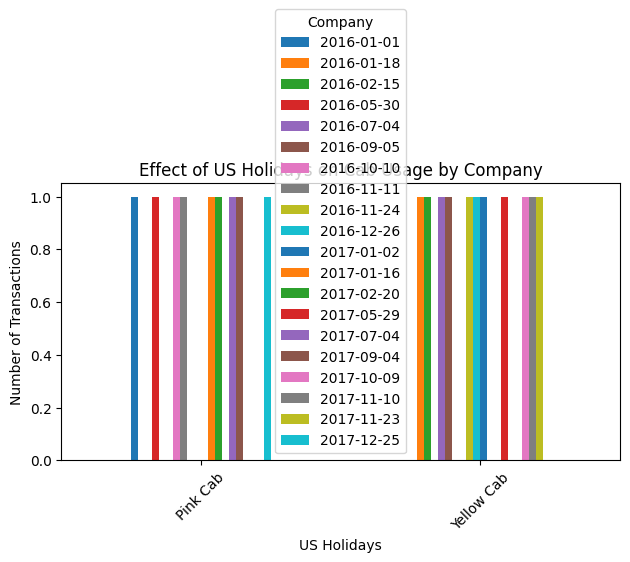

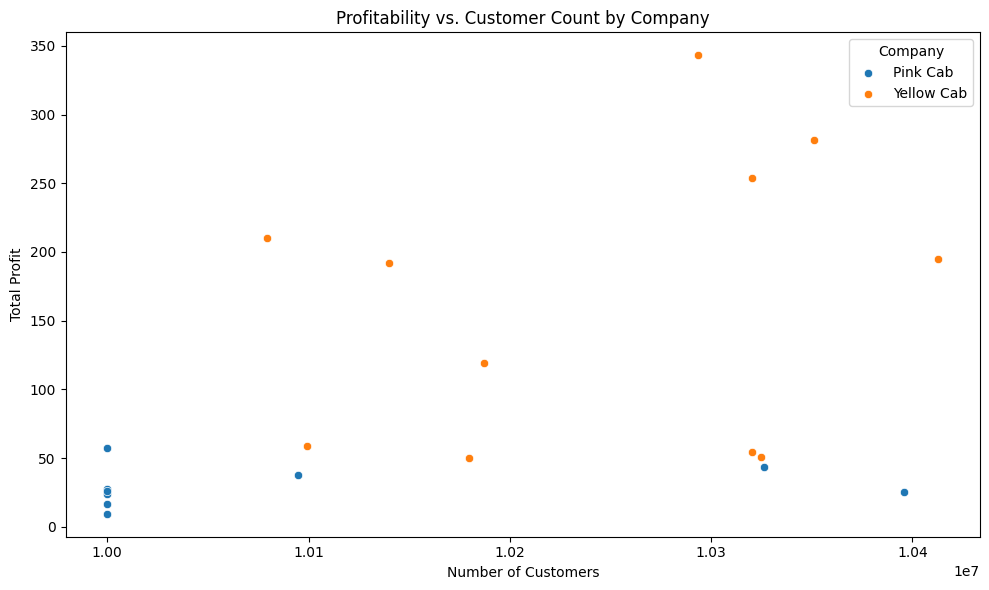

In [39]:
# Hypothesis 3: Effect of Holidays by Company
holiday_effect_by_company = df.groupby(['Company', 'US Holidays'])['Transaction ID'].count().unstack()
plt.figure(figsize=(10, 6))
holiday_effect_by_company.plot(kind='bar')
plt.xlabel('US Holidays')
plt.ylabel('Number of Transactions')
plt.title('Effect of US Holidays on Cab Usage by Company')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'holiday_effect_by_company.png'))
plt.show()

# Hypothesis 4: Profitability vs. Customer Count by Company (combined)
plt.figure(figsize=(10, 6))
for company in df['Company'].unique():
    data_company = df[df['Company'] == company]
    profit_vs_customers = data_company.groupby('Transaction ID')['Profit'].sum()
    sns.scatterplot(x=profit_vs_customers.index, y=profit_vs_customers.values, label=company)
plt.xlabel('Number of Customers')
plt.ylabel('Total Profit')
plt.title('Profitability vs. Customer Count by Company')
plt.legend(title='Company')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'profit_vs_customers_by_company_combined.png'))
plt.show()


<Figure size 1000x600 with 0 Axes>

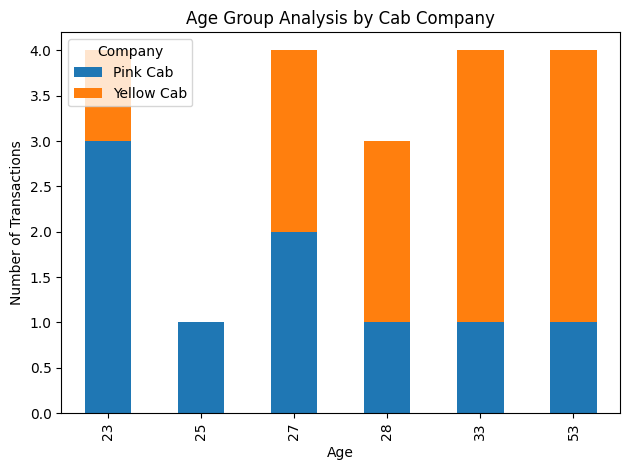

In [41]:
# Hypothesis 5: Age Group Analysis
age_group_analysis = df.groupby(['Age', 'Company'])['Transaction ID'].count().unstack()
plt.figure(figsize=(10, 6))
age_group_analysis.plot(kind='bar', stacked=True)
plt.xlabel('Age')
plt.ylabel('Number of Transactions')
plt.title('Age Group Analysis by Cab Company')
plt.legend(title='Company')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'age_group_analysis.png'))
plt.show()

<Figure size 800x500 with 0 Axes>

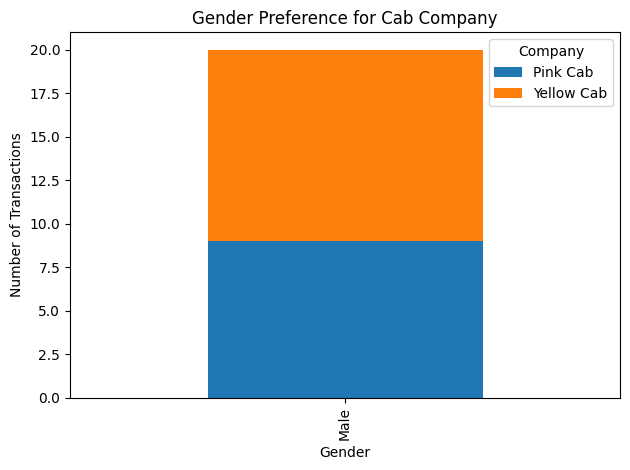

In [44]:
gender_preference = df.groupby(['Gender', 'Company'])['Transaction ID'].count().unstack()
plt.figure(figsize=(8, 5))
gender_preference.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.title('Gender Preference for Cab Company')
plt.legend(title='Company')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'gender_preference.png'))
plt.show()

<Figure size 1000x600 with 0 Axes>

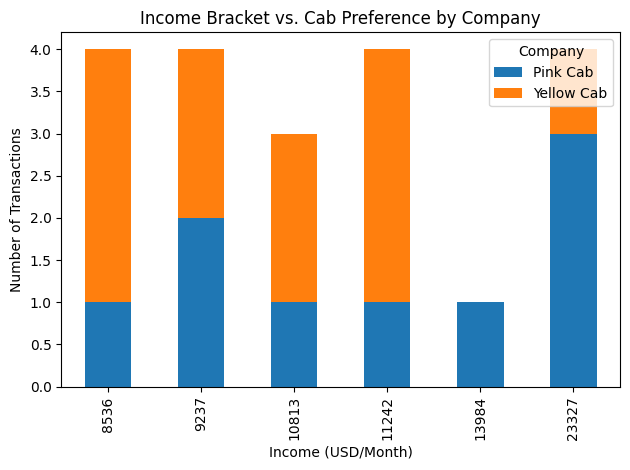

In [45]:
# Hypothesis 7: Income Bracket and Cab Preference
income_cab_preference = df.groupby(['Income (USD/Month)', 'Company'])['Transaction ID'].count().unstack()
plt.figure(figsize=(10, 6))
income_cab_preference.plot(kind='bar', stacked=True)
plt.xlabel('Income (USD/Month)')
plt.ylabel('Number of Transactions')
plt.title('Income Bracket vs. Cab Preference by Company')
plt.legend(title='Company')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'income_cab_preference.png'))
plt.show()


<Figure size 1000x600 with 0 Axes>

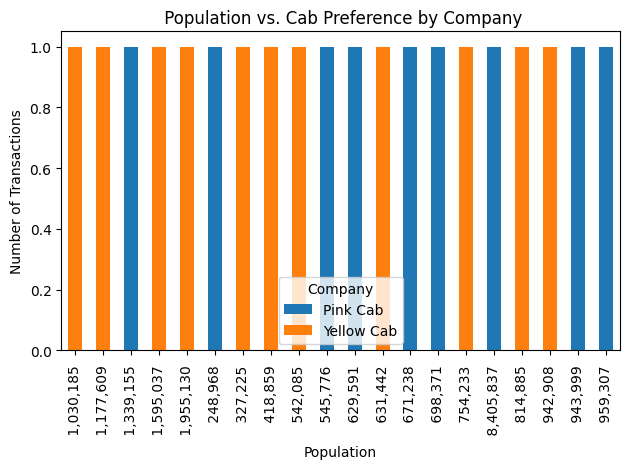

In [47]:
# Hypothesis 8: City Population vs. Cab Preference
city_population_cab = df.groupby(['Population', 'Company'])['Transaction ID'].count().unstack()
plt.figure(figsize=(10, 6))
city_population_cab.plot(kind='bar', stacked=True)
plt.xlabel('Population')
plt.ylabel('Number of Transactions')
plt.title(' Population vs. Cab Preference by Company')
plt.legend(title='Company')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'city_population_cab.png'))
plt.show()


<Figure size 800x500 with 0 Axes>

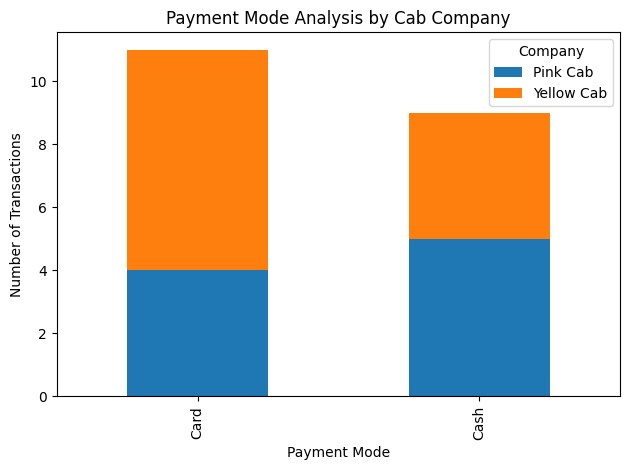

In [48]:

# Hypothesis 9: Payment Mode Analysis
payment_mode_analysis = df.groupby(['Payment_Mode', 'Company'])['Transaction ID'].count().unstack()
plt.figure(figsize=(8, 5))
payment_mode_analysis.plot(kind='bar', stacked=True)
plt.xlabel('Payment Mode')
plt.ylabel('Number of Transactions')
plt.title('Payment Mode Analysis by Cab Company')
plt.legend(title='Company')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'payment_mode_analysis.png'))
plt.show()

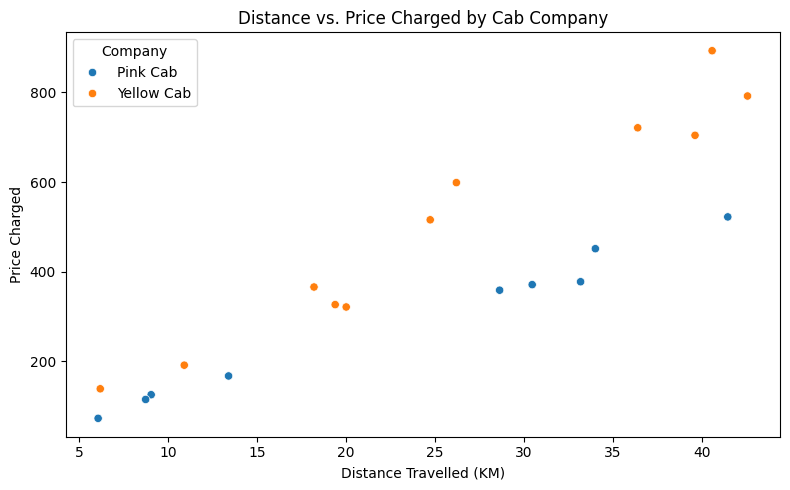

In [50]:

# Hypothesis 11: Distance vs. Price Charged by Company
plt.figure(figsize=(8, 5))
sns.scatterplot(x='KM Travelled', y='Price Charged', hue='Company', data=df)
plt.xlabel('Distance Travelled (KM)')
plt.ylabel('Price Charged')
plt.title('Distance vs. Price Charged by Cab Company')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'distance_price_charged.png'))
plt.show()

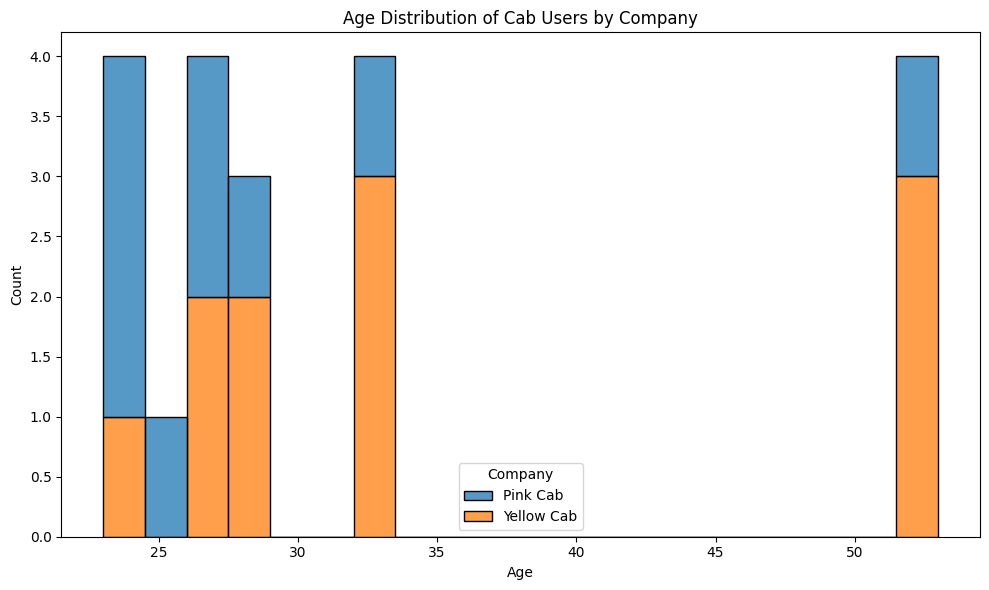

In [51]:

# Hypothesis 12: Age Distribution of Cab Users by Company
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Company', data=df, bins=20, multiple='stack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Cab Users by Company')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'age_distribution.png'))
plt.show()

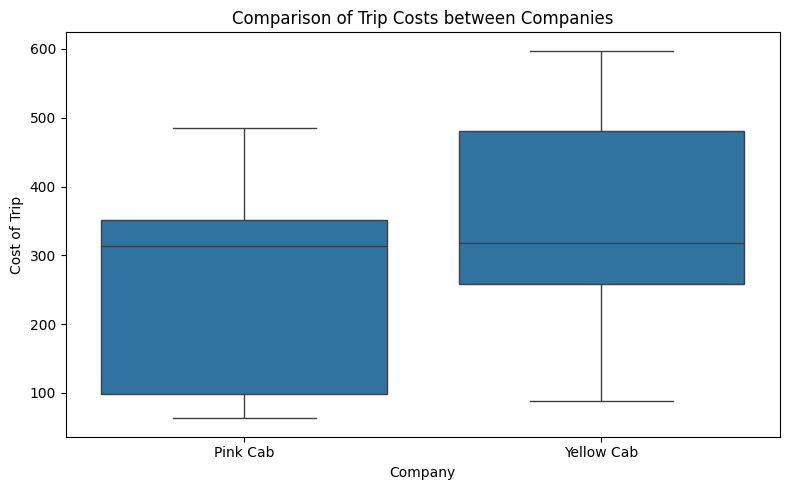

In [52]:
# Hypothesis 13: Comparison of Trip Costs between Companies
plt.figure(figsize=(8, 5))
sns.boxplot(x='Company', y='Cost of Trip', data=df)
plt.xlabel('Company')
plt.ylabel('Cost of Trip')
plt.title('Comparison of Trip Costs between Companies')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'cost_of_trip_comparison.png'))
plt.show()

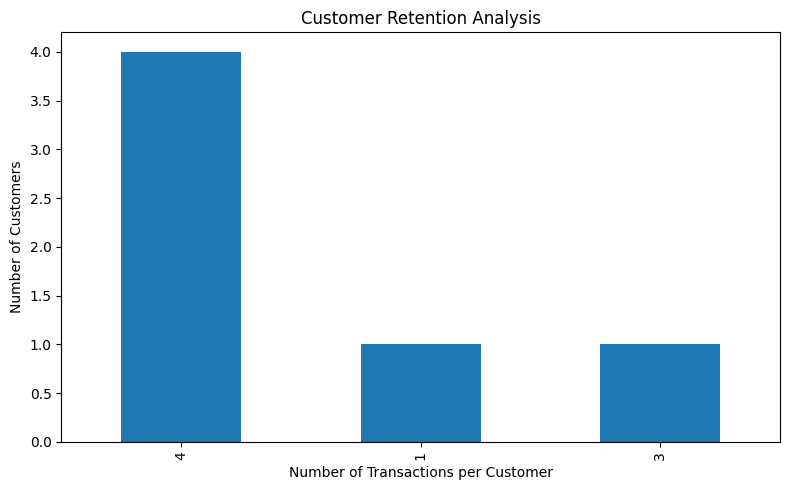

In [57]:

# Hypothesis 15: Customer Retention Analysis
customer_retention = df.groupby('Customer ID')['Transaction ID'].count().value_counts()
plt.figure(figsize=(8, 5))
customer_retention.plot(kind='bar')
plt.xlabel('Number of Transactions per Customer')
plt.ylabel('Number of Customers')
plt.title('Customer Retention Analysis')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'customer_retention.png'))

<Figure size 1000x600 with 0 Axes>

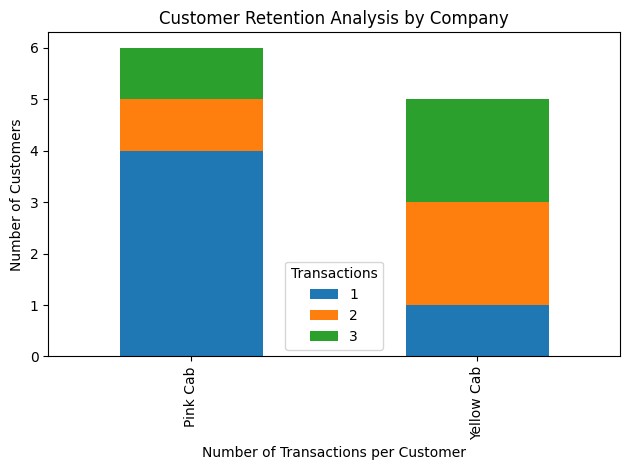

In [58]:
# Hypothesis 15: Customer Retention Analysis by Company
customer_retention_by_company = df.groupby(['Company', 'Customer ID'])['Transaction ID'].count().reset_index()
customer_retention_by_company = customer_retention_by_company.groupby('Company')['Transaction ID'].value_counts().unstack().fillna(0)
plt.figure(figsize=(10, 6))
customer_retention_by_company.plot(kind='bar', stacked=True)
plt.xlabel('Number of Transactions per Customer')
plt.ylabel('Number of Customers')
plt.title('Customer Retention Analysis by Company')
plt.legend(title='Transactions')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'customer_retention_by_company.png'))
plt.show()
